# Projet de modélisation d'un mix énergétique issu 100% d'ENR

## V. Analyse des simulations

### Imports

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
colors = ["steelblue", "Mediumaquamarine", "#FFE066", "slateblue", "#FFD8A8", "Lightslategray", "grey", "#09F1D3", "#74C0FC"]

## 1. Analyse

## 2. Analyse de l'optimisation de la capacité de production installée :

In [3]:
weather = pd.read_csv('outputs/weather years.csv')
weather.head(16)

,year,Offshore_capa,Onshore_capa,PV_capa,biogas_capa,hydro_capa,Batt_volume,Methanation_volume,PHS_volume,Offshore_gene,...,Methanation_gene,PHS_gene,LCOE,spot_price,LC,str_loss,cf_offshore,cf_onshore,cf_pv,cf_gas
0,2000,11.46,84.14,105.74,18.24,20.5,60.17,5.52,180,54.08,...,7.21,23.86,47.89,53.83,11.64,5.06,0.538,0.334,0.158,0.139
1,2001,0.38,104.62,105.74,28.61,20.5,41.91,8.45,180,1.77,...,7.33,20.88,48.40,54.20,12.76,4.87,0.537,0.335,0.162,0.089
2,2002,17.12,69.66,105.55,19.16,20.5,74.70,4.60,180,82.05,...,6.31,22.09,46.82,54.60,10.90,4.62,0.547,0.348,0.157,0.127
3,2003,10.21,90.15,106.83,15.70,20.5,62.78,5.62,180,44.99,...,4.90,22.09,49.31,54.21,12.38,3.76,0.503,0.311,0.164,0.088
4,2004,0.00,105.29,113.38,21.88,20.5,70.32,15.30,180,0.00,...,9.95,21.24,50.51,56.91,11.75,6.43,0.509,0.322,0.161,0.130
5,2005,0.00,105.89,110.38,25.22,20.5,60.27,9.37,180,0.00,...,7.64,23.15,49.81,54.18,11.94,5.26,0.507,0.312,0.165,0.102
6,2006,12.36,80.08,122.17,32.89,20.5,74.62,12.90,180,56.90,...,10.07,21.89,51.65,56.46,11.99,6.53,0.525,0.324,0.162,0.087
7,2007,0.00,98.40,118.33,27.61,20.5,65.73,12.05,180,0.00,...,9.55,21.86,49.40,55.59,13.40,6.14,0.532,0.341,0.164,0.100
8,2008,0.78,101.95,105.20,21.76,20.5,52.03,12.05,180,3.67,...,7.56,21.70,47.81,55.23,11.27,5.16,0.536,0.331,0.158,0.120
9,2009,11.61,89.32,107.79,18.83,20.5,51.47,6.92,180,51.41,...,6.37,22.07,49.02,54.72,13.02,4.47,0.504,0.315,0.162,0.130


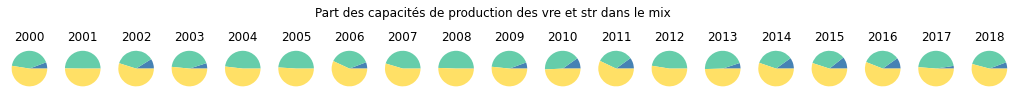

In [5]:
fig, axs = plt.subplots(1,19, figsize=(18,18))
for i in range(19):
    y = np.array([weather["Offshore_capa"][i], weather["Onshore_capa"][i], weather["PV_capa"][i]])
    axs[i].pie(y, colors=colors)
    axs[i].set_title(str(2000+i))
plt.suptitle("Part des capacités de production des vre et str dans le mix", y=0.55)
plt.show()

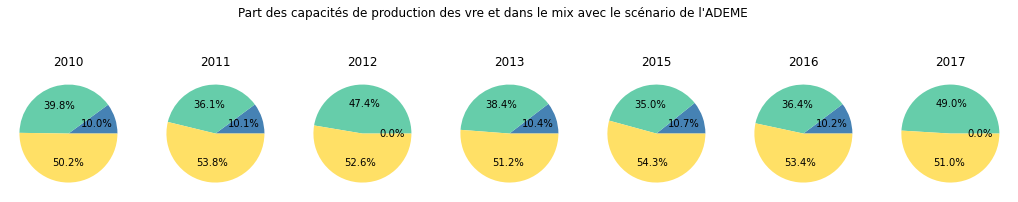

In [6]:
list_simu = ["2010_ademe", "2011_ademe", "2012_ademe","2013_ademe", "2015_ademe", "2016_ademe", "2017_ademe"]
nb_annees = len(list_simu)
fig, axs = plt.subplots(1,nb_annees, figsize=(18,18))

for i in range(nb_annees):
    name_load_factor = list_simu[i]
    capa = pd.read_csv("simulations/complete_simulations/simu_"+name_load_factor+"/simu_"+name_load_factor+"_Q.csv", names=['vre', 'capa'])
    y = np.array([capa["capa"][1], capa["capa"][2], capa["capa"][3]])
    axs[i].pie(y, autopct = lambda y: str(round(y, 1)) + '%', colors=colors)
    if i <= 3 :
        axs[i].set_title(str(2010+i))
    else :
        axs[i].set_title(str(2011+i))

plt.suptitle("Part des capacités de production des vre et dans le mix avec le scénario de l'ADEME", y=0.6)
plt.show()

## 3. Analyse des variations de la production des vre sur plusieurs années

In [7]:
# Calcul des productions de chaque technologie à partir des mix obtenus après la simulation
def Tableau_production(name_load_factor, opti=False):
    if opti:
        p = pd.read_csv("simulations/optimal_simulations/simu_opti_"+name_load_factor+"/simu_opti_"+name_load_factor+"_hourly_generation.csv")
    else:
        p = pd.read_csv("simulations/complete_simulations/simu_"+name_load_factor+"/simu_"+name_load_factor+"_hourly_generation.csv")
    
    p_offshore = 0
    p_onshore = 0
    p_pv = 0
    p_meth = 0
    p_phs = 0
    p_batterie = 0

    for i in range(8735):
        p_offshore += p['offshore'][i]
        p_onshore += p['onshore'][i]
        p_pv += p['pv'][i]
        p_meth += p['methanation'][i]
        p_phs += p['phs'][i]
        p_batterie += p['battery'][i]
    
    p = np.array([p_offshore,p_onshore,p_pv,p_meth,p_phs,p_batterie])
    return p

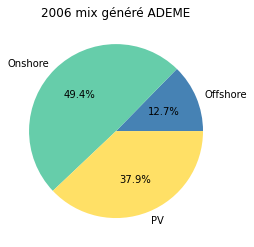

In [8]:
y = Tableau_production("ademe", opti=1)[:3]
plt.pie(y, labels = ["Offshore","Onshore","PV"], autopct = lambda y: str(round(y, 1)) + '%', colors=colors)
plt.title("2006 mix généré ADEME")
plt.show()

### 3.1 Part de la production des vre et str dans les mix de plusieurs années

In [9]:
# Affichage du diagramme camembert des productions des vre et str
def Affichage_diag(names,sce):        
    fig, axs = plt.subplots(1,5, figsize=(18,18))
    
    for i in range(5):
        pp = Tableau_production(names[i])
        print(i, " ", pp)
        y = np.array([pp[0], pp[1], pp[2], pp[3], pp[4], pp[5]])
        axs[i].pie(y, labels = ["Offshore","Onshore","PV","Methanation", "PHS", "Battery",], colors=colors)
        if i <= 1 :
            axs[i].set_title(str(2012+i))
        else :
            axs[i].set_title(str(2013+i))
    plt.suptitle("Part de la production des vre et str dans le mix pour le scénario de " + sce, y=0.6)
    plt.show()

In [38]:
# Affichage du diagramme camembert des productions des vre
def Affichage_diag_vre(names,sce):      
    #fig, axs = plt.subplots(1,len(names), figsize=(18,18))
    fig, axs = plt.subplots(1,len(names), figsize=(12,12))
    
    for i in range(len(names)):
        pp = Tableau_production(names[i])
        y = np.array([pp[0], pp[1], pp[2]])
        axs[i].pie(y, labels = ["Offshore","Onshore","PV"], autopct = lambda y: str(round(y, 2)) + '%',
                   textprops = dict(color='k', fontsize=9), colors=colors)
        if i <= 1 :
            axs[i].set_title(names[i][:4])
        else :
            axs[i].set_title(names[i][:4])
    plt.suptitle("Production of each technology for " + sce + " demand", y=0.3)  #0.6
    plt.show()

#### Pour RTE

0   [ 81235.08 339326.44 230990.85  17731.91  16529.05  44212.26]
1   [ 92900.67 335957.04 213226.24  17842.2   15994.06  39212.14]
2   [ 95833.53 336743.27 203098.1   14103.82  15638.48  37626.19]
3   [ 88028.5  321477.46 213064.28  11752.27  16720.49  43872.56]
4   [ 87765.85 322250.18 233277.88  15427.4   16579.06  45438.7 ]


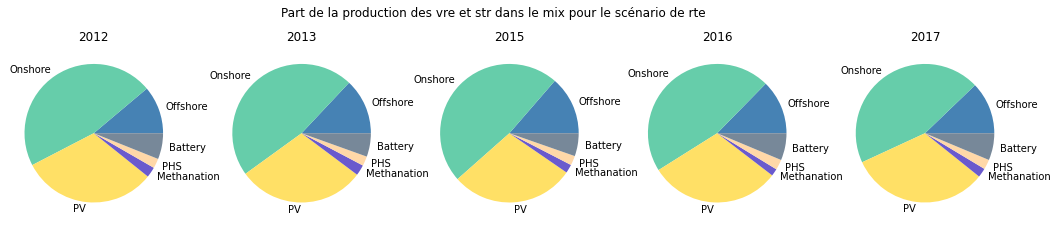

In [14]:
Affichage_diag(['2012_rte', '2013_rte', '2015_rte', '2016_rte', '2017_rte'], "rte")

### 3.2 Part de la production des vre dans les mix de plusieurs années

#### Pour RTE

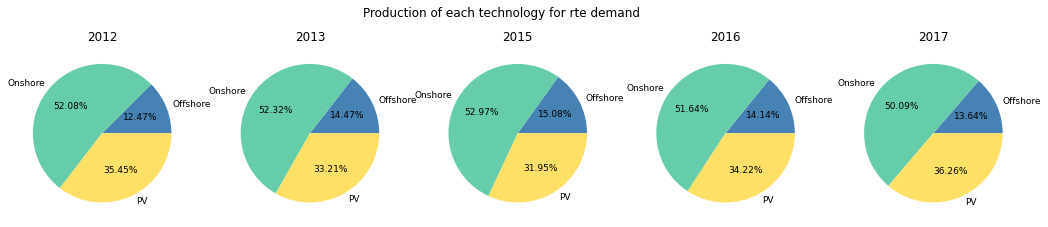

In [15]:
Affichage_diag_vre(['2012_rte', '2013_rte', '2015_rte', '2016_rte', '2017_rte'], "rte")

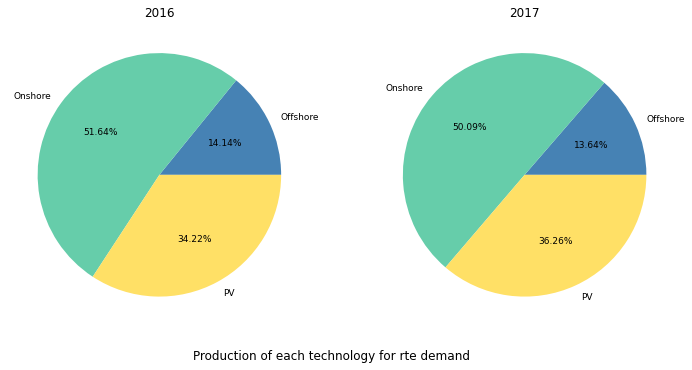

In [39]:
Affichage_diag_vre(['2016_rte', '2017_rte'], "rte")

#### Pour l'ADEME

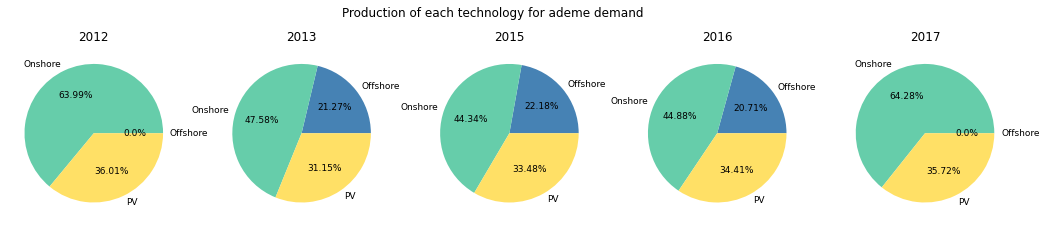

In [16]:
Affichage_diag_vre(['2012_ademe', '2013_ademe', '2015_ademe', '2016_ademe', '2017_ademe'], "ademe")

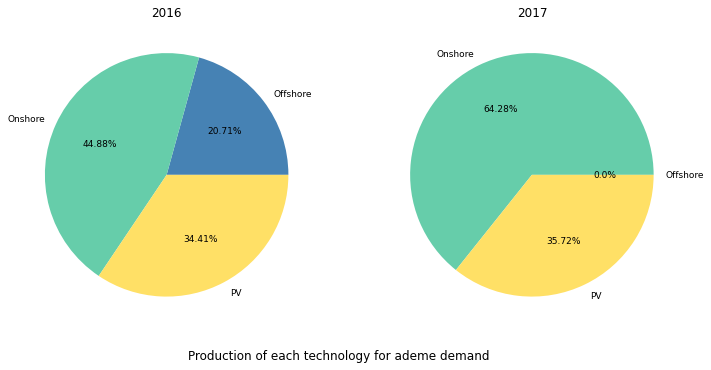

In [40]:
Affichage_diag_vre(['2016_ademe', '2017_ademe'], "ademe")

#### Pour NégaWatt

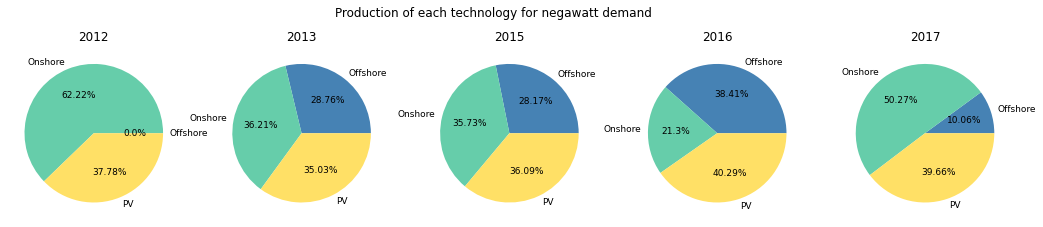

In [17]:
Affichage_diag_vre(['2012_nega', '2013_nega', '2015_nega', '2016_nega', '2017_nega'], "negawatt")

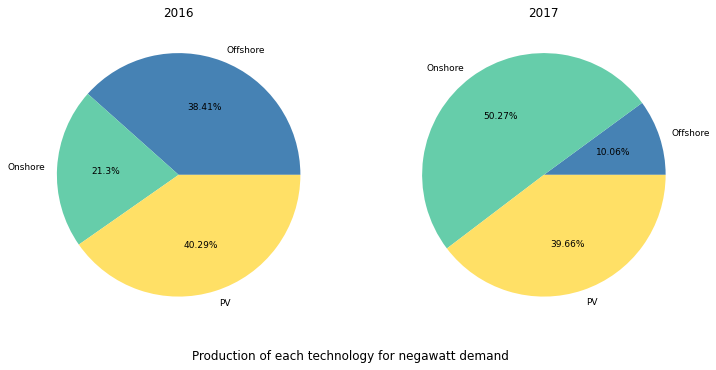

In [41]:
Affichage_diag_vre(['2016_nega', '2017_nega'], "negawatt")

In [19]:
vre2016 = pd.read_csv("inputs/vre_profiles2016.csv", header=None)
vre2017 = pd.read_csv("inputs/vre_profiles2017.csv", header=None)

vre2013 = pd.read_csv("inputs/vre_profiles2013.csv", header=None)
vre2015 = pd.read_csv("inputs/vre_profiles2015.csv", header=None)

vre2012 = pd.read_csv("inputs/vre_profiles2012.csv", header=None)
vre2017 = pd.read_csv("inputs/vre_profiles2017.csv", header=None)

In [20]:
# vre1 = vre2013
# vre2 = vre2015

vre1 = vre2016
vre2 = vre2017

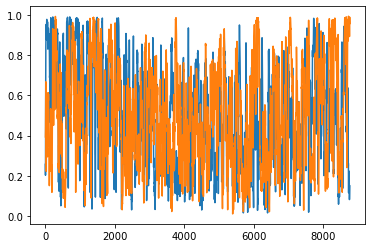

In [21]:
plt.plot(vre2016[:8760][2])
plt.plot(vre2017[:8760][2])

In [22]:
print("2016 offshore ", np.mean(vre1[:8760][2]))

2016 offshore  0.502815117417581


In [23]:
print("2017 offshore ", np.mean(vre2[:8760][2]))

2017 offshore  0.5036774624913245


In [24]:
abs(np.mean(vre1[:8760][2]) - np.mean(vre2[:8760][2]))

0.0008623450737434979

In [25]:
print("2016 onshore ", np.mean(vre1[8760:8760*2][2]))

2016 onshore  0.3060399579673499


In [26]:
print("2017 onshore ", np.mean(vre2[8760:8760*2][2]))

2017 onshore  0.30881676821860665


In [27]:
abs(np.mean(vre1[8760:8760*2][2]) - np.mean(vre2[8760:8760*2][2]))

0.002776810251256756

In [28]:
print("2016 solar ", np.mean(vre1[8760*2:][2]))

2016 solar  0.16040346015604998


In [29]:
print("2017 solar ", np.mean(vre2[8760*2:][2]))

2017 solar  0.16423582140696308


In [30]:
abs(np.mean(vre1[8760*2:][2]) - np.mean(vre2[8760*2:][2]))

0.003832361250913102

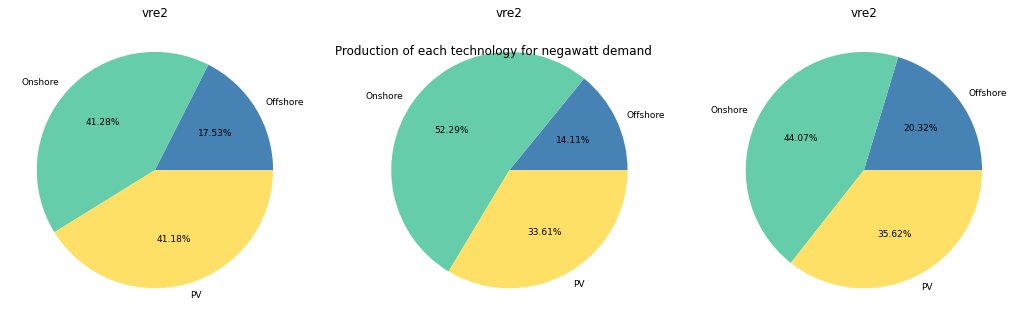

In [18]:
Affichage_diag_vre(['vre2006_nega', 'vre2006_rte','vre2006_ademe'], "negawatt")